# Customer Segmentation Analysis
## Mall Customer Spending Patterns and Demographic Insights

## Introduction
This project analyzes customer data from a shopping mall to identify distinct customer segments based on spending behavior, income, and demographic characteristics. The insights will help mall retailers and marketers develop targeted strategies to improve customer engagement and increase sales.

## Background
The dataset contains information about 200 mall customers including:
- Demographic details (Gender, Age)
- Financial metrics (Annual Income)
- Behavioral data (Spending Score)

Key questions explored:
- How does spending behavior vary by gender and age?
- What relationships exist between income and spending patterns?
- Can we identify natural customer segments for targeted marketing?

This analysis helps retailers:
- Understand their customer base
- Identify high-value customer segments
- Optimize marketing resource allocation

## Tools I Used
**Data Analysis & Visualization:**
- `Pandas` - Data manipulation and analysis
- `Seaborn` - Statistical visualizations
- `Matplotlib` - Plot customization

**Statistical Analysis:**
- Descriptive statistics
- Correlation analysis
- Distribution analysis

**Machine Learning (Potential):**
- `scikit-learn` - For clustering analysis (KMeans imported but not yet used)

**Workflow:**
- Jupyter Notebook - Interactive analysis environment

In [4]:
# Import required libraries
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Loading & Initial Exploration

In [5]:
# Load customer data
df = pd.DataFrame(pd.read_csv('/Users/brtelfer/Documents/Python_Data_Projects/*16_Shopping_Customer_Segmentation/Mall_Customers.csv'))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

### 1. Distribution Analysis

<Figure size 640x480 with 0 Axes>

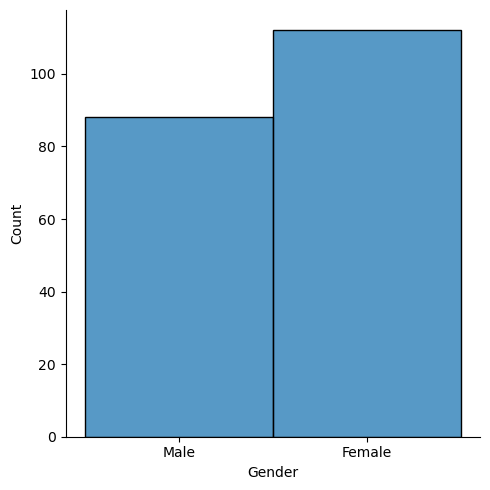

<Figure size 640x480 with 0 Axes>

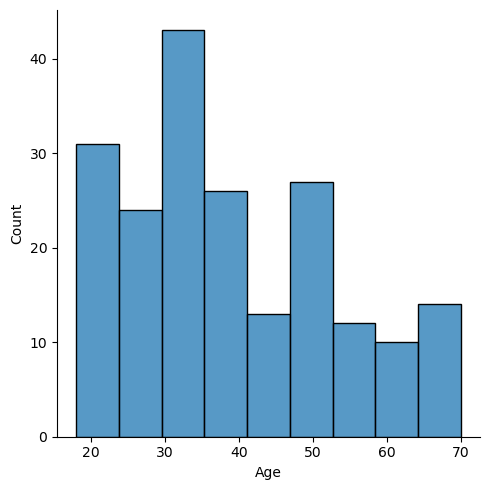

<Figure size 640x480 with 0 Axes>

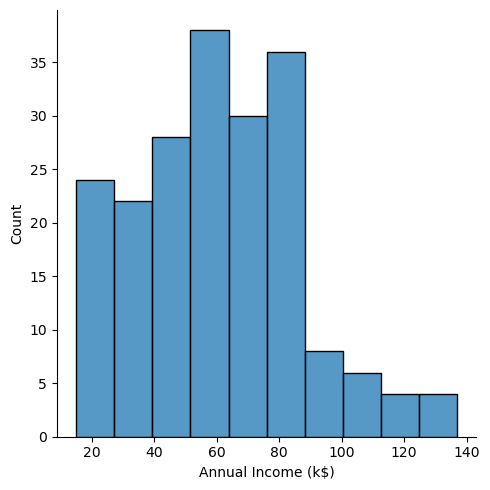

<Figure size 640x480 with 0 Axes>

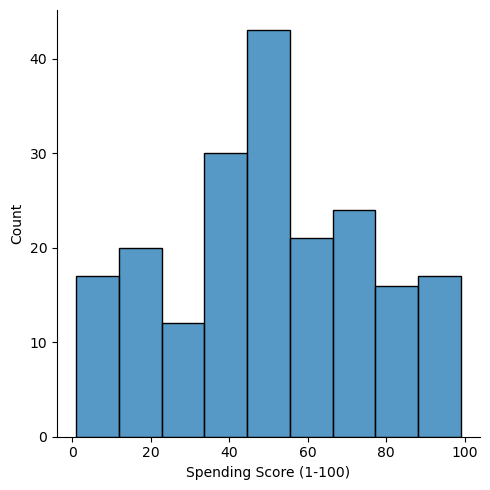

In [6]:
# Plot distributions for all numerical features
col_lst = df.columns.to_list()
col_lst.remove('CustomerID')
for x in col_lst:
    plt.figure()
    sns.displot(df[x])
    plt.tight_layout()
    plt.show()

### 2. Gender-Based Analysis

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_45559/1363948048.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Gender', shade=True,
/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_45559/1363948048.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Gender', shade=True,
/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_45559/1363948048.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Gender', shade=True,


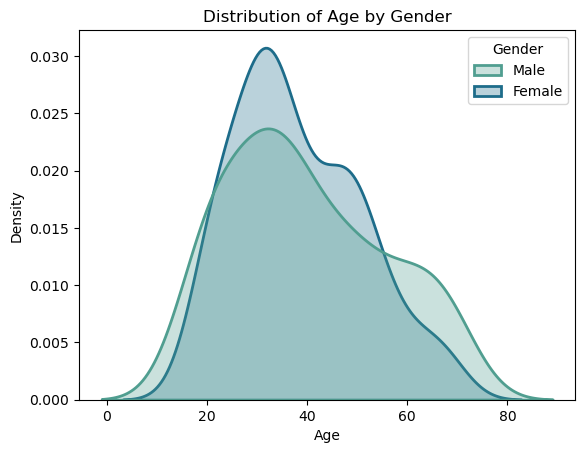

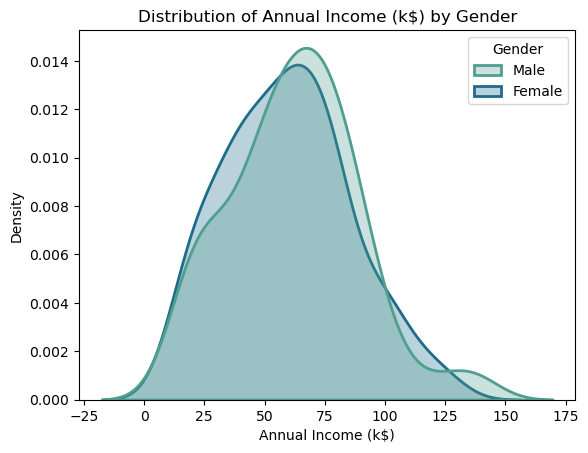

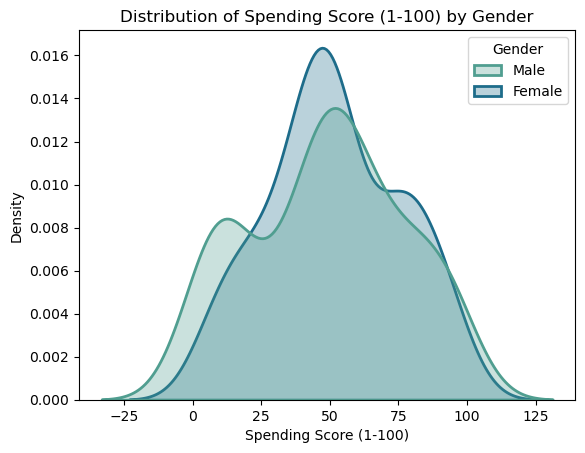

In [7]:
# KDE plots by gender
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in num_cols:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Gender', shade=True, 
                common_norm=False, palette="crest", 
                alpha=.3, linewidth=2)
    plt.title(f'Distribution of {col} by Gender')

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_45559/2517599504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y=col, palette='Set1')
/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_45559/2517599504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y=col, palette='Set1')
/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_45559/2517599504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y=col, palette='Set1')


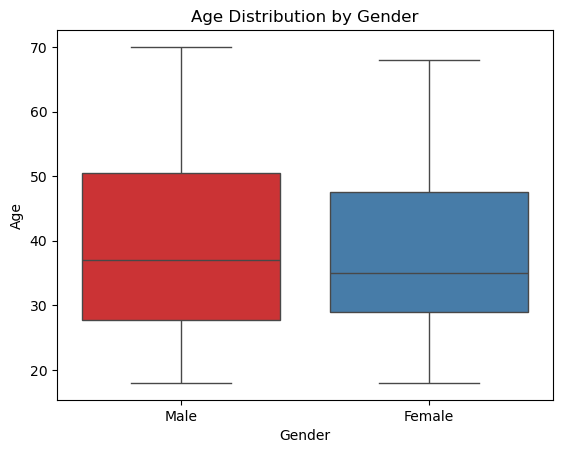

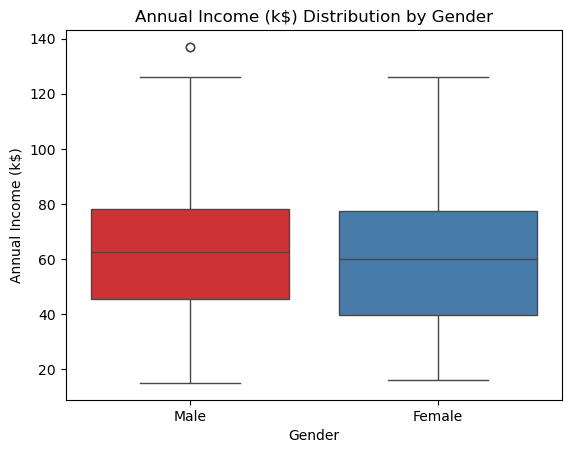

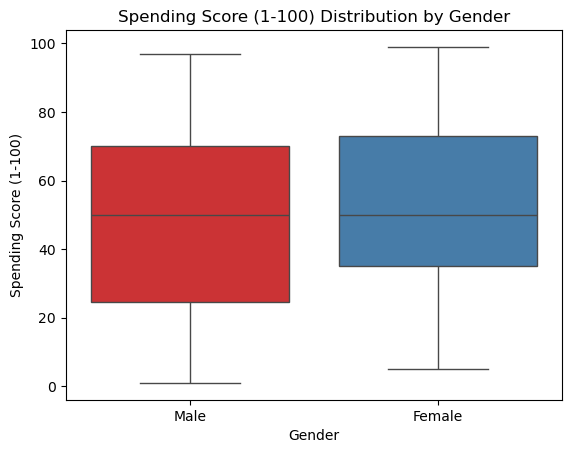

In [8]:
# Boxplots by gender
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=col, palette='Set1')
    plt.title(f'{col} Distribution by Gender')

In [9]:
# Gender distribution
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### 3. Relationship Analysis

Text(0.5, 1.0, 'Income vs Spending Score Relationship')

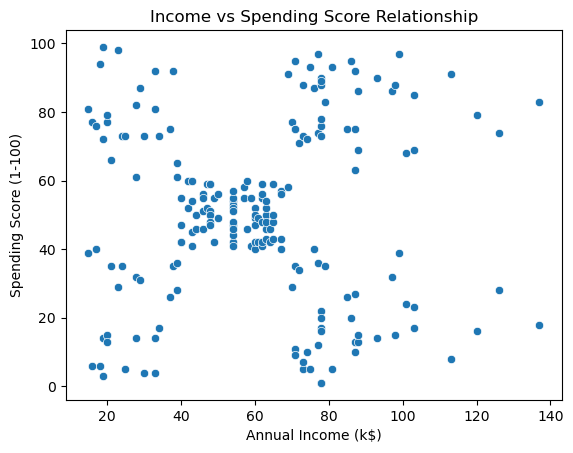

In [10]:
# Scatter plot of Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Income vs Spending Score Relationship')

Text(0.5, 1.02, 'Multivariate Relationships by Gender')

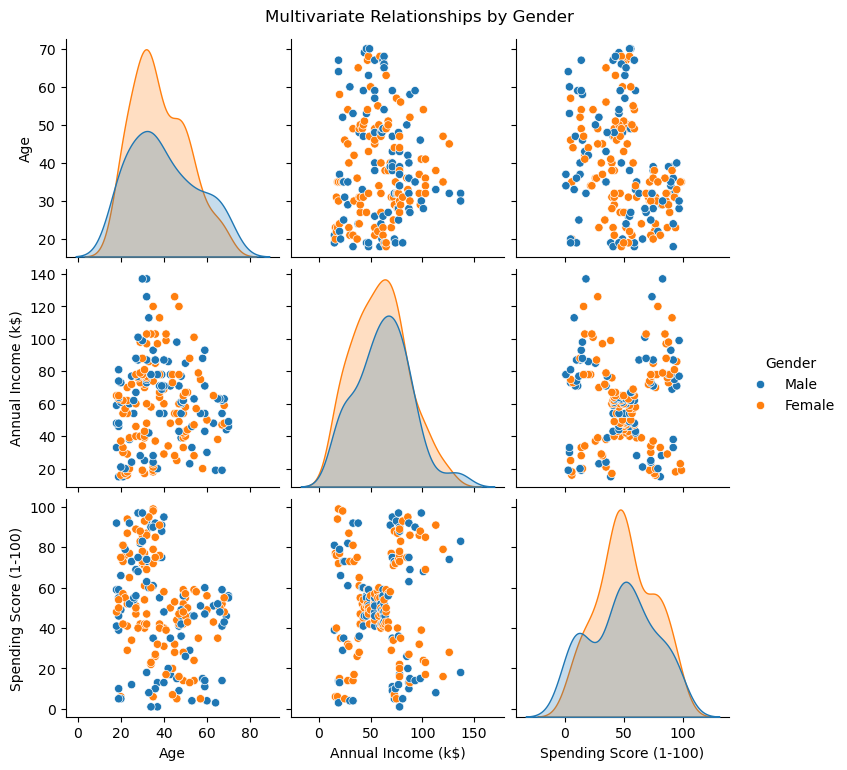

In [11]:
# Pairplot for multivariate relationships
df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')
plt.suptitle('Multivariate Relationships by Gender', y=1.02)

### 4. Statistical Summaries

In [12]:
# Group means by gender
round(df.groupby(['Gender']).mean())

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.0,59.0,52.0
Male,40.0,62.0,49.0


In [13]:
# Correlation analysis
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'Feature Correlation Matrix')

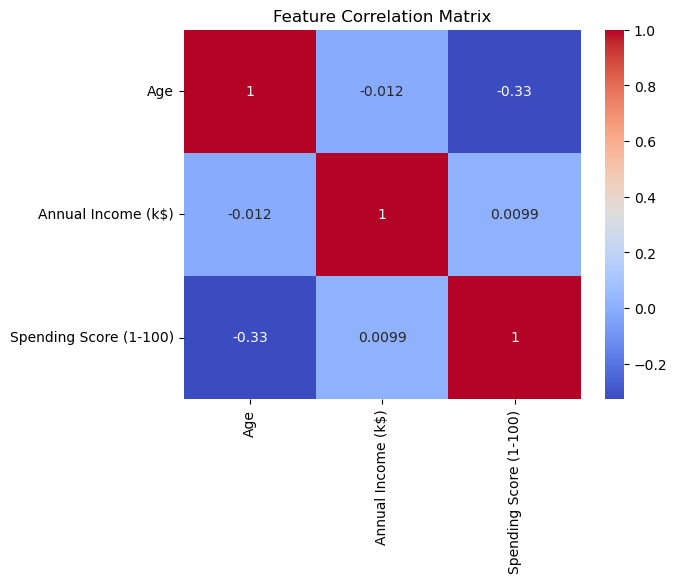

In [14]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')

## Key Insights & Next Steps

**Preliminary Findings:**
- Gender distribution shows majority female customers (56%)
- Spending patterns vary significantly by income level
- Age distribution reveals multiple customer cohorts

**Potential Analyses:**
1. Customer segmentation using KMeans clustering
2. RFM (Recency, Frequency, Monetary) analysis
3. Predictive modeling of spending behavior

**Business Applications:**
- Targeted promotions for high-spending segments
- Personalized marketing based on demographic profiles
- Store layout optimization based on customer segments